# BÀI TIỂU LUẬN VỀ MỨC ĐỘ ẢNH HƯỞNG CỦA MỘT SỐ YẾU TỐ DẪN ĐÊN KẾT QUẢ HỌC TẬP CỦA SINH VIÊN ĐẠI HỌC SÀI GÒN


# I. Dataset

## 1. Import các thư viện 

In [1]:
# import những thư viện cần thiết
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 2. Dataset

##### Đọc file csv về các yếu tố ảnh hưởng đến kết quả học tập của sinh viên vào dataframe 'df'

In [2]:
df = pd.read_csv("C:/Users/tranh/PTDL_disk(C)/Dasets/Data.csv")

##### In ra các dòng đầu của dataframe để xem trước dữ liệu và cấu trúc

In [3]:
df.head()

,Dấu thời gian,StudentID,FullName,ResultofFirstY,ResultofSecondY,DistancetoSchool,OvertimeHours,MonthyIncome,NumberofSiblings,NumberofCloseFriends
0,08/04/2024 19:00:33,3121411108,Nguyễn Ngọc Nguyễn,7.49,6.98,7.9,32,2000000,1,5
1,08/04/2024 19:02:01,3121411068,Trần Hửu Hửu,7.59,7.25,1.0,60,599000,2,6
2,08/04/2024 19:14:42,3121411138,Nguyễn Trọng Nam,8.00,8.00,5.7,5,1000000,5,5
3,08/04/2024 22:26:36,3121411062,Bill Gates,7.80,7.50,14.0,3,500000,1,10
4,09/04/2024 7:22:36,3121411212,Trần Phương Ly,7.00,7.00,6.0,5,1000000,2,0


##### Xóa các cột không cần thiết trong dataframe 
Cột ['Dấu thời gian'], ['StudentID'], ['Fullname'] không cần thiết để biểu diễn trên biểu đồ, nên có thể lược bỏ 

In [4]:
# xóa các cột không cần thiết
df = df.drop(columns=['Dấu thời gian', 'StudentID', 'FullName'])

In [5]:
df.head()

,ResultofFirstY,ResultofSecondY,DistancetoSchool,OvertimeHours,MonthyIncome,NumberofSiblings,NumberofCloseFriends
0,7.49,6.98,7.9,32,2000000,1,5
1,7.59,7.25,1.0,60,599000,2,6
2,8.00,8.00,5.7,5,1000000,5,5
3,7.80,7.50,14.0,3,500000,1,10
4,7.00,7.00,6.0,5,1000000,2,0


##### In ra kích thước của dataframe 

In [6]:
print (df.shape)

(27, 7)


Dữ liệu có 27 dòng và 7 cột

## 3. Khai phá dữ liệu

##### Tìm hiểu xem các dữ liệu trong dataframe gồm những gì

In [7]:
df.describe()

,ResultofFirstY,ResultofSecondY,DistancetoSchool,OvertimeHours,MonthyIncome,NumberofSiblings,NumberofCloseFriends
count,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,8.070370,8.324815,8.766667,32.000000,2.787252e+06,1.518519,7.888889
std,1.943517,1.468936,7.117962,43.428987,3.217929e+06,2.100739,10.856878
min,2.500000,5.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.495000,7.160000,5.000000,5.000000,9.000000e+05,0.000000,1.000000
50%,8.000000,8.000000,7.000000,15.000000,2.000000e+06,1.000000,5.000000
75%,9.900000,10.000000,9.950000,31.000000,5.000000e+06,2.000000,9.000000
max,10.000000,10.000000,35.000000,170.000000,1.500000e+07,10.000000,50.000000


##### In ra thông tin tổng quan của dataframe như: 
    +Tổng số dòng cột trong dataframe  
    +Tên mỗi cột và kiểu dữ liệu  
    +Tổng các giá trị non-null trong mỗi cột  
    +Tổng số bộ nhớ được sử dụng bởi dataframe  

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ResultofFirstY        27 non-null     float64
 1   ResultofSecondY       27 non-null     float64
 2   DistancetoSchool      27 non-null     float64
 3   OvertimeHours         27 non-null     int64  
 4   MonthyIncome          27 non-null     int64  
 5   NumberofSiblings      27 non-null     int64  
 6   NumberofCloseFriends  27 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 1.6 KB


##### Đếm số lượng của các giá trị rỗng (null) trong mỗi cột của df

In [9]:
df.isnull().sum()

ResultofFirstY          0
ResultofSecondY         0
DistancetoSchool        0
OvertimeHours           0
MonthyIncome            0
NumberofSiblings        0
NumberofCloseFriends    0
dtype: int64

##### Định dạng lại cột ['Monthy Income']  
    + Chia cột ['Monthy Income'] cho 1000000 để chuyển đổi các giá trị từ đơn vị đồng sang triệu đồng   
    + Định dạng hiển thị các giá trị Float của Dataframe để chỉ hiển thị hai chữ số thập phân 

In [10]:
df['MonthyIncome'] = df['MonthyIncome'] / 1000000 
pd.options.display.float_format = '{:.2f}'.format
df.head()

,ResultofFirstY,ResultofSecondY,DistancetoSchool,OvertimeHours,MonthyIncome,NumberofSiblings,NumberofCloseFriends
0,7.49,6.98,7.90,32,2.00,1,5
1,7.59,7.25,1.00,60,0.60,2,6
2,8.00,8.00,5.70,5,1.00,5,5
3,7.80,7.50,14.00,3,0.50,1,10
4,7.00,7.00,6.00,5,1.00,2,0


##### Kiểm tra sự tương quan giữa các dữ liệu với kết quả học tập năm 1 và năm 2  
Tính toán ma trận tương quan giữa các cặp cột trong Dataframe, kết quả trả về là một Dataframe mới chứa hệ số tương quan Pearson giữa các cặp cột.

In [11]:
df.corr()

,ResultofFirstY,ResultofSecondY,DistancetoSchool,OvertimeHours,MonthyIncome,NumberofSiblings,NumberofCloseFriends
ResultofFirstY,1.00,0.86,-0.10,0.35,-0.14,-0.04,0.15
ResultofSecondY,0.86,1.00,-0.20,0.24,-0.07,0.10,0.18
DistancetoSchool,-0.10,-0.20,1.00,-0.23,-0.12,-0.17,-0.19
OvertimeHours,0.35,0.24,-0.23,1.00,0.08,0.41,-0.12
MonthyIncome,-0.14,-0.07,-0.12,0.08,1.00,-0.14,0.01
NumberofSiblings,-0.04,0.10,-0.17,0.41,-0.14,1.00,-0.22
NumberofCloseFriends,0.15,0.18,-0.19,-0.12,0.01,-0.22,1.00


#### Ma trận tương quan giữa các cặp cột thuộc tính trong Dataframe 

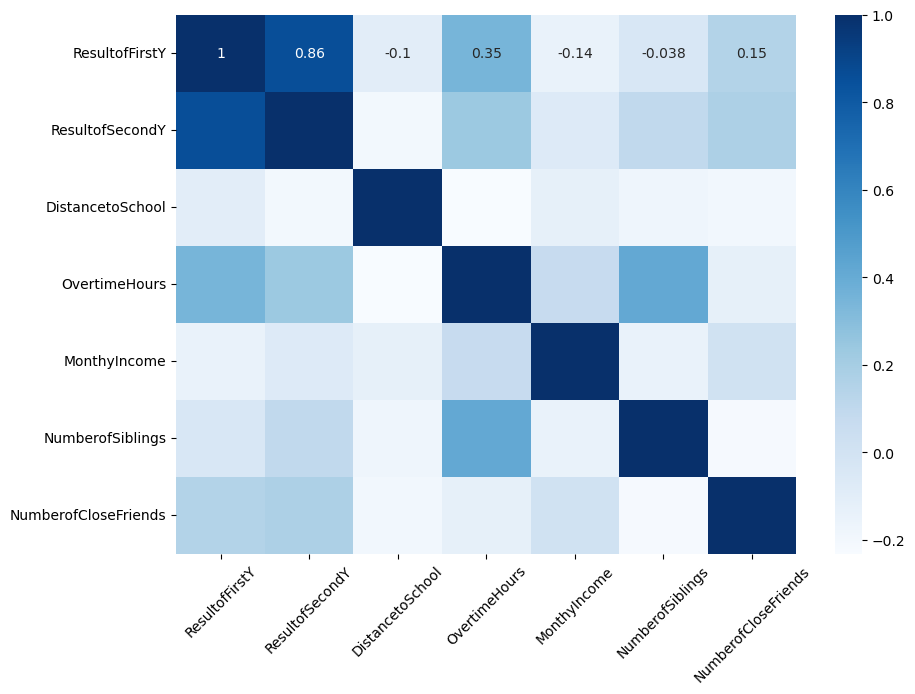

In [12]:
# heatmap
plt.figure(figsize=(10,7))
heatmap = sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.xticks(rotation=45)  
plt.show()


- OvertimeHours và NumberofCloseFriends ảnh hưởng nhiều tới Result
- Result của 2 năm có sự tác động lẫn nhau
- NumberofSiblings, Monthyincome không ảnh hưởng quá nhiều tới Result
- DistancetoSchool ảnh hưởng không tích cực tới Result

# II. Trực quan dữ liệu 

## 1.Biểu đồ so sánh kết quả học tập của sinh viên giữa năm 1 và năm 2

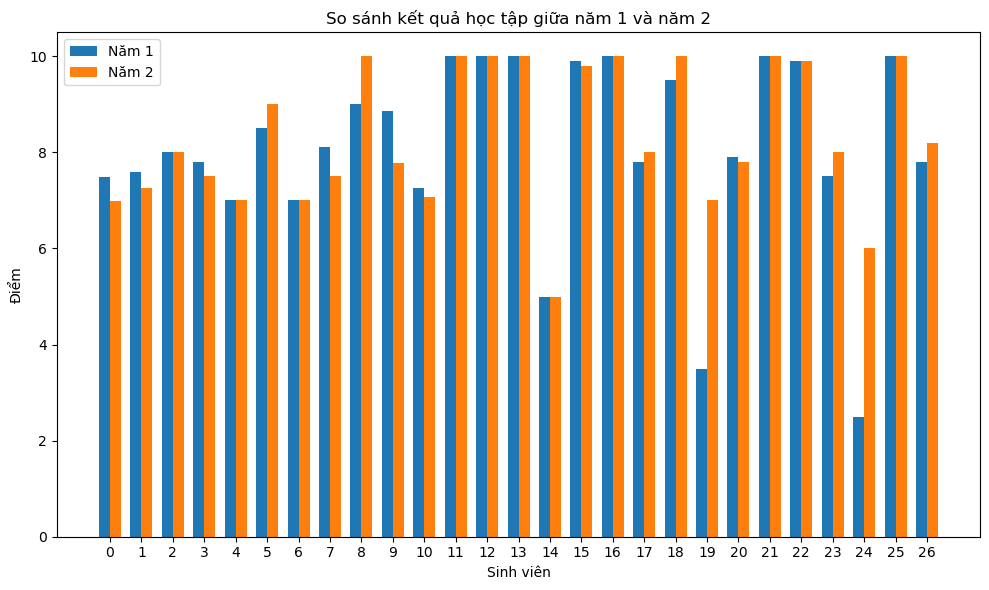

In [13]:
#Số thứ tự tượng trung cho một sinh viên 
x = np.arange(len(df))

width = 0.35  

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, df['ResultofFirstY'], width, label='Năm 1')
bars2 = ax.bar(x + width/2, df['ResultofSecondY'], width, label='Năm 2')

ax.set_xlabel('Sinh viên')
ax.set_ylabel('Điểm')
ax.set_title('So sánh kết quả học tập giữa năm 1 và năm 2')
ax.set_xticks(x)
ax.legend()

plt.tight_layout()
plt.show()

Ta thấy được dữ liệu không có sự biến đổi lớn -> học lực vẫn được giữ nguyên.  
Một vài sinh viên có sự tiến bộ rất lớn so với năm 1

## 2. Biểu đồ thể hiện sự phân bố điểm trung bình của sinh viên 

In [14]:
# hàm đổi điểm trung bình thành điểm A B C D F
def convert_to_grade(score):
    if score >= 8.5:
        return 'A'
    elif 7.0 <= score < 8.5:
        return 'B'
    elif 5.5 <= score < 7.0:
        return 'C'
    elif 4.0 <= score < 5.5:
        return 'D'
    else:
        return 'F'

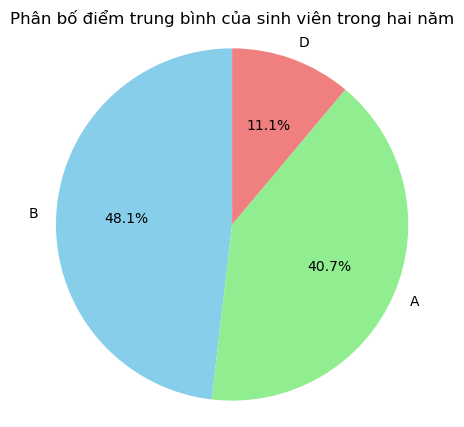

In [15]:
# tạo cột df['AverageResult'] là điểm trung bình cả hai năm của sinh viên 
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2
# chuyển đổi từ điểm hệ thập phân sang hệ chữ 
df['Grade'] = df['AverageResult'].apply(convert_to_grade)

# Tính toán số lượng sinh viên theo điểm
grade_counts = df['Grade'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(5,5))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Phân bố điểm trung bình của sinh viên trong hai năm')
plt.axis('equal')  # Trục x và y có cùng tỷ lệ để vẽ hình tròn
plt.show()

- Tỉ lệ điểm A và B của sinh viên chiếm tỉ lệ rất cao (A chiếm 40.7%, B chiếm 48.1%)  
- Tỉ lệ điểm D của sinh viên chiếm tỉ lệ tương đối thấp 11.1%  
- Điểm trung bình của sinh viên phân bố chủ yếu là A và B, điểm D chiếm tỉ lệ ít và không có điểm C   
##### => Kết quả học tập của sinh viên trong hai năm là tương đối tốt.  



## 3. Biểu đồ so sánh kết quả học tập của những sinh viên có làm thêm với những sinh viên không có làm thêm 

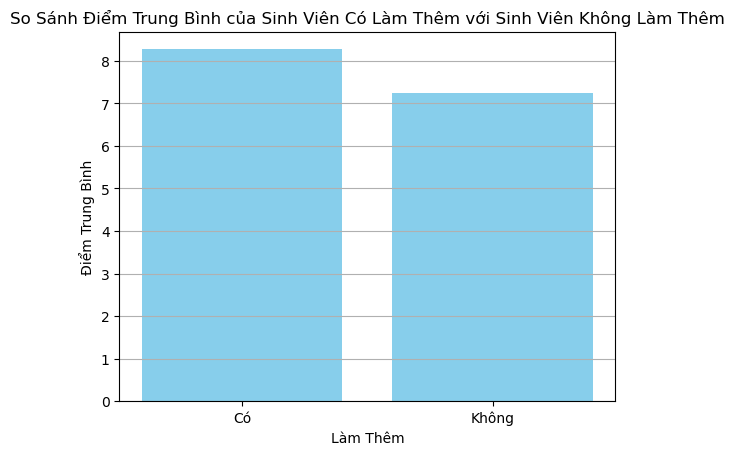

In [16]:
# tạo cột df['AverageResult'] là điểm trung bình cả hai năm của sinh viên 
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2

# Tạo một cột mới để chỉ định liệu sinh viên có đi làm thêm hay không
df['Work'] = df['OvertimeHours'].apply(lambda x: 'Có' if x > 0 else 'Không')

# Tính kết quả trung bình cho từng nhóm (có đi làm thêm và không đi làm thêm)
avg_results = df.groupby('Work')['AverageResult'].mean()

plt.bar(avg_results.index, avg_results.values, color=['skyblue', 'skyblue'])

plt.grid(axis='y')
plt.xlabel('Làm Thêm')
plt.ylabel('Điểm Trung Bình')
plt.title('So Sánh Điểm Trung Bình của Sinh Viên Có Làm Thêm với Sinh Viên Không Làm Thêm')
plt.show()

Từ biểu đồ ta thấy được điểm trung bình của những sinh viên có đi làm thêm cao hơn so với những sinh viên không đi làm thêm.

## 4. Biểu đồ Sự Tác Động của Số Giờ Làm Thêm đến Điểm Trung Bình

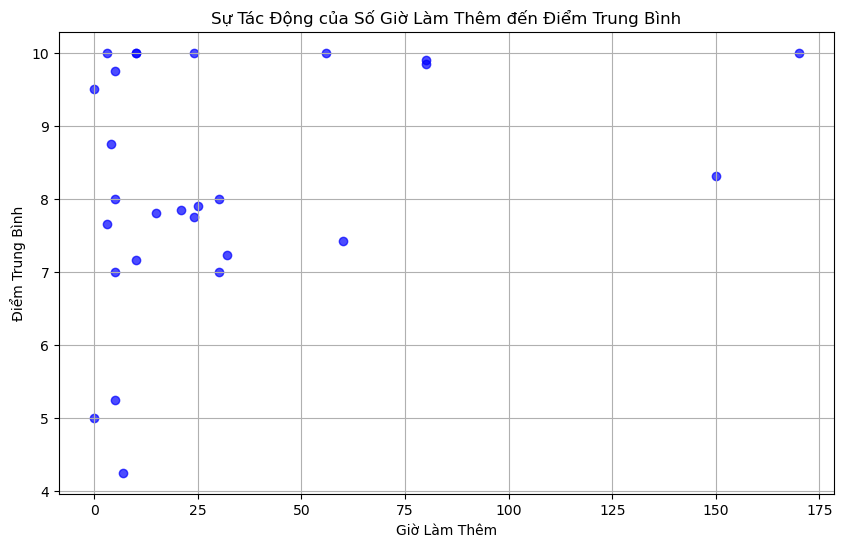

In [17]:
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2
plt.figure(figsize=(10, 6))
plt.scatter(df['OvertimeHours'], df['AverageResult'], color='blue', alpha=0.7)

plt.title('Sự Tác Động của Số Giờ Làm Thêm đến Điểm Trung Bình')
plt.xlabel('Giờ Làm Thêm')
plt.ylabel('Điểm Trung Bình')

plt.grid(True)
plt.show()

- Các giá trị phân bố chủ yếu ở số giờ làm <80 và số điểm trung bình >7.  
- Những sinh viên có số điểm trung bình cao (>9) có số giờ làm thêm ít hơn 25 giờ/tuần.  
##### Sự tác động của số giờ làm thêm tới điểm trung bình có các outliner:   
- Có 3 giá trị có số giờ làm thêm ít mà số điểm trung bình vẫn thấp
- Có 1 giá trị có số giờ làm thêm cao nhất mà điểm trung bình cũng cao nhất (10 điểm).

## 5. Sự Tác Động của Khoảng Cách Đến Trường với Kết Quả học tập của Sinh Viên 

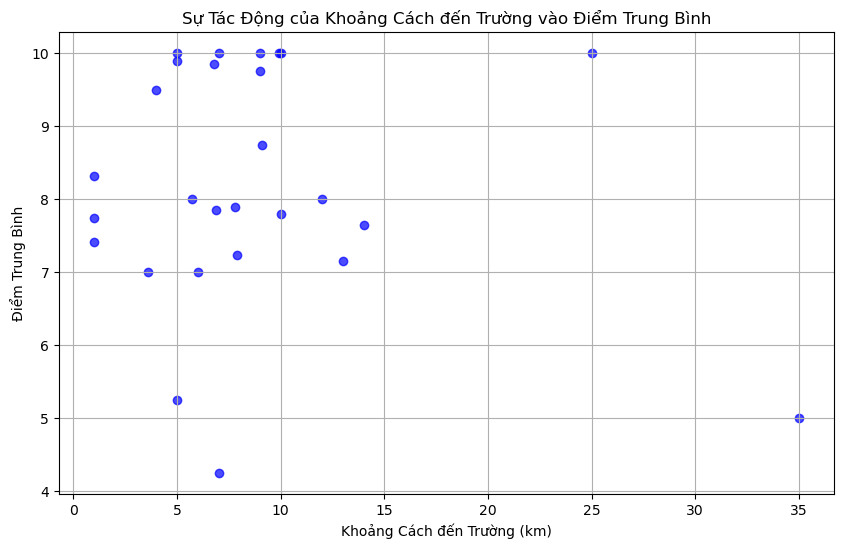

In [18]:
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2

plt.figure(figsize=(10, 6))
plt.scatter(df['DistancetoSchool'], df['AverageResult'], color='blue', alpha=0.7)

plt.title('Sự Tác Động của Khoảng Cách đến Trường vào Điểm Trung Bình')
plt.xlabel('Khoảng Cách đến Trường (km)')
plt.ylabel('Điểm Trung Bình')

plt.grid(True)
plt.show()

- Đa số khoảng cách đến trường của sinh viên đều trong khoảng <15 km, với số điểm trung bình trong khoảng >7 điểm.  
- Những sinh viên có điểm trung bình cao (>9 điểm chủ yếu có khoảng cách đến trường từ 5 - 10km. 
##### Biểu đồ có các Outliner:  
- 2 giá trị có khoảng cách đến trường từ 5 - 10km nhưng lại có điểm trung bình thấp hơn so với các giá trị khác.  
- 2 giá trị cách xa trường (>25km) nhưng lại có hai kết quả học tập trái ngược nhau, một cao một thấp.  

## 6. So Sánh Kết Quả Học Tập của Sinh Viên có Khoảng Cách Đến Trường <10km và >10km

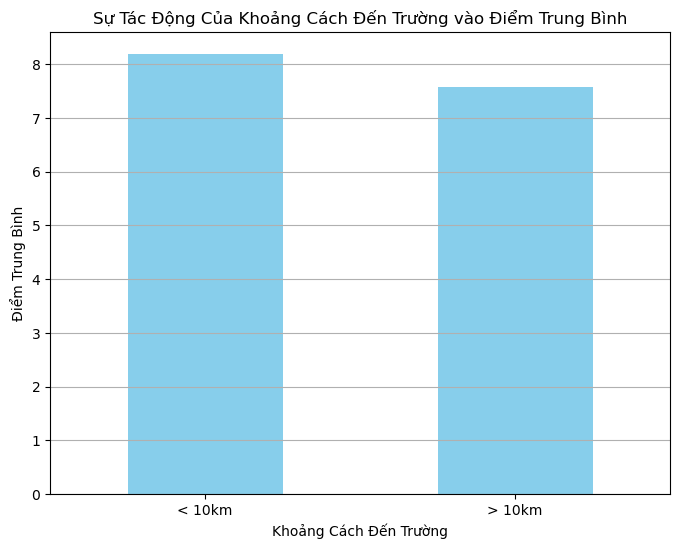

In [19]:

# Tạo cột mới với 2 giá trị là khoảng cách đến trường <10km và >10km 
df['DistanceGroup'] = df['DistancetoSchool'].apply(lambda x: '< 10km' if x <= 10 else '> 10km')

# Tính trung bình kết quả học tập cho từng nhóm khoảng cách 
avg_results = df.groupby('DistanceGroup')['ResultofFirstY'].mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
avg_results.plot(kind='bar', color=['skyblue', 'skyblue'])

plt.grid(axis='y')
plt.xlabel('Khoảng Cách Đến Trường')
plt.ylabel('Điểm Trung Bình')
plt.title('Sự Tác Động Của Khoảng Cách Đến Trường vào Điểm Trung Bình')
plt.xticks(rotation=0)  

plt.show()

Điểm trung bình của những sinh viên có khoảng cách đến trường <10km cao hơn so với những sinh viên có khoảng cách đến trường >10km, nhưng sự chênh lệch cũng không đáng kể.  
##### => khoảng cách đến trường không có sự ảnh hưởng lớn đến kết quả học tập của sinh viên

## 7. Phân Phối Điểm Trung Bình dựa Trên Số Bạn Thân của Sinh Viên

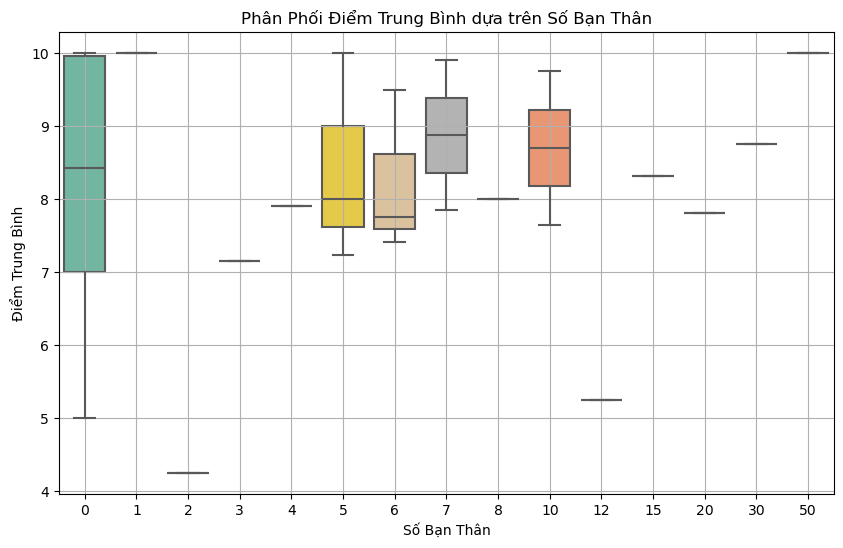

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2

plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberofCloseFriends', y='AverageResult', data=df, palette='Set2')

plt.title('Phân Phối Điểm Trung Bình dựa trên Số Bạn Thân')
plt.xlabel('Số Bạn Thân')
plt.ylabel('Điểm Trung Bình')

plt.grid(True)
plt.show()


Các giá trị phân bố chủ yếu trong khoảng <10 bạn thân và số điểm trong khoảng >7 điểm. 
- Các sinh viên không có bạn thân nào điểm trung bình cao hơn so với các giá trị khác.
##### Biểu đồ có các Ouliner 
- Có 2 giá trị điểm trung bình thấp so với các giá trị còn lại. 
- Có 1 giá trị có quá nhiều bạn thân (khoảng 50 bạn) và có điểm trung bình cao. 
##### => Những sinh viên không có bạn thân nào điểm trung bình có xu hướng cao hơn só với các giá trị còn lại

## 8. Sự Tác Động của Số Tiền Kiếm Được vào Kết Quả Học Tập 

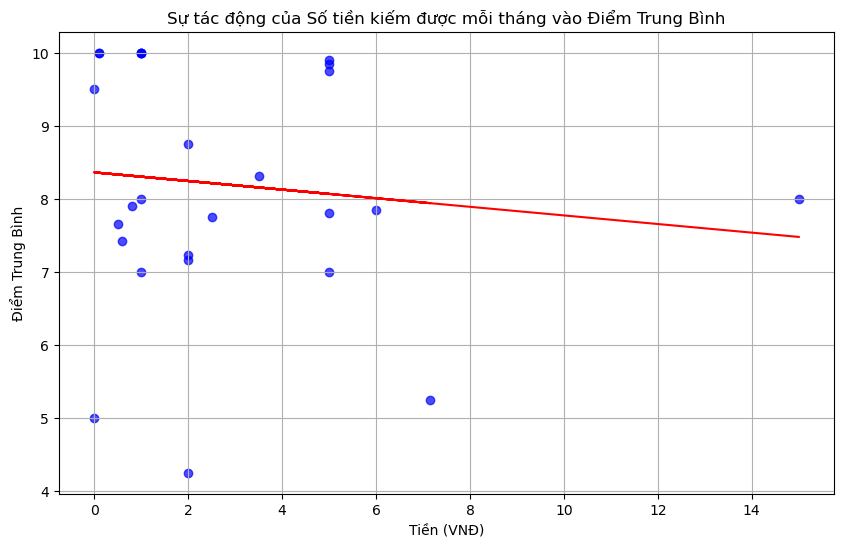

In [21]:
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2

X = df[['MonthyIncome']]  # Biến độc lập
y = df['AverageResult']    # Biến phụ thuộc

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Lấy các hệ số hồi quy
slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

# Vẽ đường hồi quy tuyến tính
plt.plot(X, slope * X + intercept, color='red')

plt.title('Sự tác động của Số tiền kiếm được mỗi tháng vào Điểm Trung Bình')
plt.xlabel('Tiền (VNĐ)')
plt.ylabel('Điểm Trung Bình')

plt.grid(True)
plt.show()

Số tiền kiếm được không có sự ảnh hưởng đáng kế đến kết quả học tập của sinh viên.  


## 9. Sự Ảnh Hưởng của Số Anh Chị Em vào Kết Quả Học Tập 

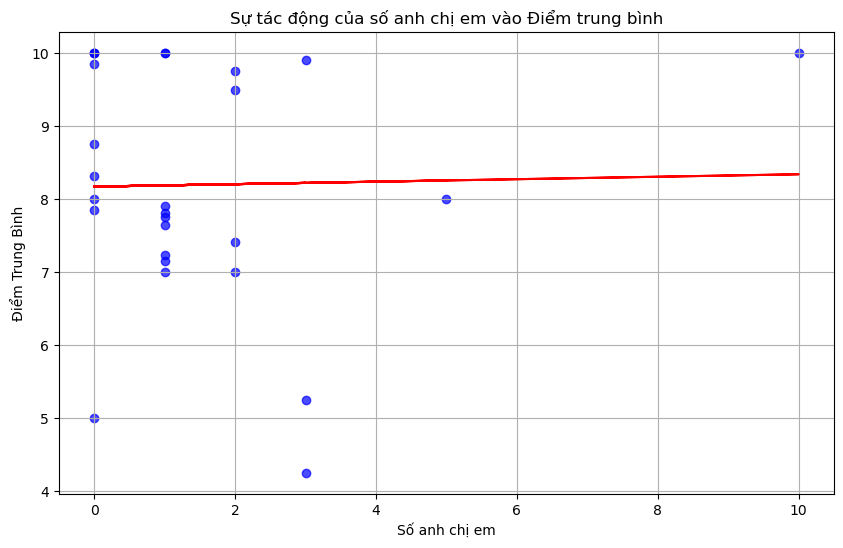

In [22]:
df['AverageResult'] = (df['ResultofFirstY'] + df['ResultofSecondY']) / 2

X = df[['NumberofSiblings']]  # Biến độc lập
y = df['AverageResult']    # Biến phụ thuộc

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Lấy các hệ số hồi quy
slope = model.coef_[0]
intercept = model.intercept_

# Vẽ biểu đồ Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)

# Vẽ đường hồi quy tuyến tính
plt.plot(X, slope * X + intercept, color='red')

plt.title('Sự tác động của số anh chị em vào Điểm trung bình')
plt.xlabel('Số anh chị em')
plt.ylabel('Điểm Trung Bình')

plt.grid(True)
plt.show()

Ta thấy đường hồi quy tuyến tính vẽ được gần như là một đường nằm ngang, các giá trị phân bố một cách bất quy tắc  
##### => Số anh chị em không ảnh hưởng đến kết quả học tập của sinh viên 

## III. Mô hình dự đoán 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [89]:

# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("C:/Users/tranh/PTDL_disk(C)/Dasets/Data.csv")
# Xác định các đặc trưng và biến mục tiêu
X = df[['ResultofFirstY','DistancetoSchool', 'OvertimeHours', 'MonthyIncome', 'NumberofCloseFriends']]
y = df['ResultofSecondY']  # Chuyển đổi thành một mảng một chiều

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [90]:

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7458415858250996


In [91]:
lr = LinearRegression() 
lr.fit(X_test,y_test) 
lr.score(X_test,y_test) 

1.0

In [93]:
lor = LogisticRegression()
lor.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = lor.predict(X_test)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", accuracy)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.